# 逻辑回归

逻辑回归是一种用于解决二分类问题的统计学习方法，其核心思想是通过一个*sigmoid*函数将线性回归的输出映射到$[0,1]$区间，表示样本属于正分类的概率。

## 数学模型

假设数据集由$N$个样本组成，$D=\{(\boldsymbol{x}_i,y_i)\}_{i=1}^N$，其中$\boldsymbol{x}_i\in\mathbb{R}^d$为特征向量，$y_i\in\{0,1\}$为二分类标签。逻辑回归模型主要包含以下两部分：

* 线性预测值

$$
z_i = \boldsymbol{w}^T\boldsymbol{x}_i + b
$$

其中 $\boldsymbol{w}\in\mathbb{R}^d$为权重向量，$b\in\mathbb{R}$为偏置项。

* 概率映射 （sigmoid函数）：
  
$$
\hat{y}_i=P(y_i=1|\boldsymbol{x}_i) = \sigma(z_i) = \frac{1}{1+e^{-z_i}}\in(0,1)
$$

其中 $\hat{y}_i=\sigma(\boldsymbol{w}^T\boldsymbol{x}_i+b)$ 表示样本属于正分类的概率

## 交叉熵损失

逻辑回归的目标函数被定义为如下的平均交叉损失熵
$$
L = -\frac{1}{N}\sum_{i=1}^N[y_i\log\hat{y}_i + (1-y_i)\log(1-\hat{y}_i)]
$$

逻辑回归对每个样本的预测是一个**伯努利分布**，其概率质量函数可以表达为：
$$
P(y_i|\boldsymbol{x}_i;\boldsymbol{w},b) = \hat{y}_i^{y_i}(1-\hat{y}_i)^{(1-y_i)}
$$
假设样本独立同分布，真实标签的联合概率是各样本概率的乘积，从而得到如下的似然函数：
$$
L(\boldsymbol{w},b) = \prod_{i=1}^N\hat{y}_i^{y_i}(1-\hat{y}_i)^{(1-y_i)}
$$
为了得到使得联合概率最大的模型参数，逻辑回归采用**极大似然估计**，即最大化似然函数 $L$。实践中往往采用最小化平均的负对数似然，即上述的平均交叉熵损失。

## PyTorch实战

下面我们使用威斯康星州乳腺癌数据集来进行逻辑回归实战

In [77]:
import torch
import torch.nn as nn

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [79]:
import matplotlib.pyplot as plt

In [80]:
# 加载数据集
data = load_breast_cancer()
X, y  = data.data, data.target
print(X.shape, y.shape)

(569, 30) (569,)


In [81]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 转化为PyTorch张量格式
X_train, y_train, X_test, y_test = [torch.tensor(data, dtype=torch.float32) for data in [X_train, y_train, X_test, y_test]]
y_train = torch.reshape(y_train,(-1,1))
y_test = torch.reshape(y_test,(-1,1))

In [82]:
# 模型定义
class logistic_regression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

input_dim = X_train.shape[1]
model = logistic_regression(input_dim)

In [83]:
# 训练配置
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
for epoch in range(1000):

    # 前向传播
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    train_losses.append(loss.item())

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 验证
    if epoch % 100 == 0:
        with torch.no_grad():
            preds = (model(X_test) > 0.5).float()
            acc = (preds == y_test).float().mean()
            print(f"Epoch {epoch:03d}, Test Acc:{acc:.6e}")

Epoch 000, Test Acc:8.859649e-01
Epoch 100, Test Acc:9.912280e-01
Epoch 200, Test Acc:9.912280e-01
Epoch 300, Test Acc:9.912280e-01
Epoch 400, Test Acc:9.912280e-01
Epoch 500, Test Acc:9.824561e-01
Epoch 600, Test Acc:9.824561e-01
Epoch 700, Test Acc:9.824561e-01
Epoch 800, Test Acc:9.824561e-01
Epoch 900, Test Acc:9.824561e-01


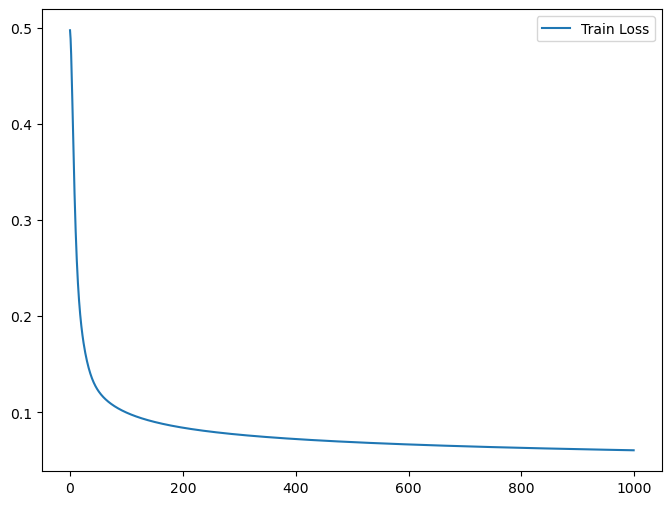

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.show()